# Khipus.ai
## Neural Network from Scratch
### Case Study: Heart Attack Analysis & Prediction Dataset
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>
---
This notebook implements a simple neural network from scratch using NumPy. We will build, train, and evaluate a basic single-layer perceptron on a heart disease dataset.

About Dataset

The Heart Attack Analysis & Prediction Dataset is a dataset used for research and analysis in the field of cardiovascular health. It typically contains various attributes related to an individual's health and lifestyle, along with an indicator of whether the individual experienced a heart attack or not.

https://www.kaggle.com/datasets/sonialikhan/heart-attack-analysis-and-prediction-dataset

## 1. Importing Required Packages
We begin by importing necessary Python libraries for data processing, visualization, and model building.

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


## 2. Loading and Preprocessing the Dataset
We use the heart disease dataset to train our neural network.

In [2]:

# Load dataset (Assume 'heart.csv' is available)
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Selecting Features and Labels
We separate the independent variables (features) from the dependent variable (target).

In [ ]:
#separate independent / dependent features
# Extract features (all columns except 'output column') and convert to numpy array
X = np.array(df.loc[:, df.columns != 'output'])# X = independent features

# Extract labels (the 'output' column) and convert to numpy array
y = np.array(df['output'])# y = dependent feature

# Print the shapes of the features and labels arrays
print(f"X: {X.shape}, y: {y.shape}")


X: (303, 13), y: (303,)


## 4. Splitting Data into Training and Testing Sets
We split the dataset into 80% training and 20% testing sets.

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)# 80% training, 20% testing


## 5. Scaling Features
To improve training performance, we scale the feature values.

In [ ]:
# Standardizing the features
scaler = StandardScaler()  # Initialize the StandardScaler
X_train_scale = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test_scale = scaler.transform(X_test)  # Transform the test data using the same scaler


## 6. Implementing a Neural Network from Scratch
We define a single-layer perceptron with a sigmoid activation function.

In [ ]:

# Define the Neural Network class
class NeuralNetworkFromScratch:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        # Initialize weights randomly with normal distribution
        self.w = np.random.randn(X_train.shape[1])
        # Initialize bias randomly with normal distribution
        self.b = np.random.randn()
        # Learning rate
        self.LR = LR
        # Training features
        self.X_train = X_train
        # Training labels
        self.y_train = y_train
        # Testing features
        self.X_test = X_test
        # Testing labels
        self.y_test = y_test
        # List to store training loss over iterations
        self.L_train = []
        # List to store testing loss over iterations
        self.L_test = []
        
    def activation(self, x):
        # Sigmoid function
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        # Derivative of sigmoid function
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        # Compute the linear combination of inputs and weights
        hidden_1 = np.dot(X, self.w) + self.b
        # Apply the activation function
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, X, y_true):
        # Compute the linear combination of inputs and weights
        hidden_1 = np.dot(X, self.w) + self.b
        # Compute the predicted output
        y_pred = self.forward(X)
        # Compute the gradient of the loss with respect to the predicted output
        dL_dpred = 2 * (y_pred - y_true)
        # Compute the gradient of the predicted output with respect to the linear combination
        dpred_dhidden1 = self.dactivation(hidden_1)
        # Gradient of the linear combination with respect to the bias
        dhidden1_db = 1
        # Gradient of the linear combination with respect to the weights
        dhidden1_dw = X

        # Compute the gradient of the loss with respect to the bias
        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        # Compute the gradient of the loss with respect to the weights
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        # Update bias using gradient descent
        self.b = self.b - dL_db * self.LR
        # Update weights using gradient descent
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # Select a random training example
            random_pos = np.random.randint(len(self.X_train))
            # Get the true label for the selected training example
            y_train_true = self.y_train[random_pos]
            # Get the predicted label for the selected training example
            y_train_pred = self.forward(self.X_train[random_pos])
            
            # Compute training loss (mean squared error)
            L = np.sum(np.square(y_train_pred - y_train_true))
            # Append the training loss to the list
            self.L_train.append(L)
            
            # Compute gradients for the selected training example
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            
            # Update weights and bias using the computed gradients
            self.optimizer(dL_db, dL_dw)

            # Compute test error (mean squared error) over the entire test set
            L_sum = 0
            for j in range(len(self.X_test)):
                # Get the true label for the test example
                y_true = self.y_test[j]
                # Get the predicted label for the test example
                y_pred = self.forward(self.X_test[j])
                # Accumulate the squared error
                L_sum += np.square(y_pred - y_true)
            # Append the test loss to the list
            self.L_test.append(L_sum)

        return "Training successfully finished" # Return a message indicating successful training


## 7. Training the Model
We train the neural network using a simple gradient descent approach.

In [ ]:

# Hyperparameters
LR = 0.1  # Learning rate for the neural network
ITERATIONS = 1000  # Number of iterations for training

# Create and train the model
nn = NeuralNetworkFromScratch(
    LR=LR,  # Set the learning rate
    X_train=X_train_scale,  # Use the scaled training features
    y_train=y_train,  # Use the training labels
    X_test=X_test_scale,  # Use the scaled testing features
    y_test=y_test  # Use the testing labels
)
nn.train(ITERATIONS=ITERATIONS)  # Train the neural network for the specified number of iterations


'Training successfully finished'

## 8. Visualizing Training Loss
We plot the loss over training iterations to observe convergence.

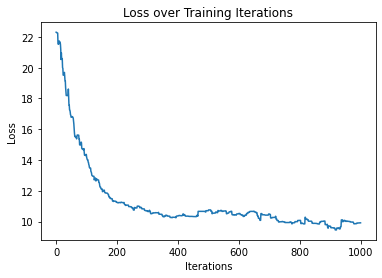

In [15]:

# Plot loss using seaborn lineplot
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)  # Plot the test loss over iterations
plt.xlabel("Iterations")  # Set the label for the x-axis
plt.ylabel("Loss")  # Set the label for the y-axis
plt.title("Loss over Training Iterations")  # Set the title of the plot
plt.show()  # Display the plot


## 9. Evaluating the Model
We test the model's accuracy by making predictions on the test dataset.

In [ ]:

# Model evaluation
total = X_test_scale.shape[0]  # Get the total number of test samples
correct = 0  # Initialize the count of correct predictions to zero
y_preds = []  # Initialize an empty list to store predicted labels

for i in range(total):  # Iterate over each test sample
    y_true = y_test[i]  # Get the true label for the current test sample
    y_pred = np.round(nn.forward(X_test_scale[i]))  # Predict the label using the neural network and round it to the nearest integer
    y_preds.append(y_pred)  # Append the predicted label to the list
    correct += 1 if y_true == y_pred else 0  # Increment the count of correct predictions if the prediction matches the true label

# Calculate accuracy
accuracy = correct / total  # Compute the accuracy as the ratio of correct predictions to the total number of test samples
print(f"Model Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy as a percentage


Model Accuracy: 73.77%


Note: The output indicates that the neural network correctly predicted about 73.77% of the test samples.
It calculates accuracy by dividing the number of correct predictions by the total number of test samples.

## 10. Confusion Matrix
We compute a confusion matrix to analyze classification performance.

In [10]:

# Compute confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[23  7]
 [ 9 22]]


Note: The model has true negatives = 23, false positives = 7, false negatives = 9, and true positives = 22.